In [14]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import ttest_ind
import math

In [11]:
run_hr = pd.read_csv("../Processed/runs_hr_summary.csv", dtype={"player": np.int64, "attempt": np.int64},
                     decimal=".").set_index(["player", "attempt"])
run_gameplay = pd.read_csv("../Processed/run_stats.csv", dtype={"player": np.int64, "attempt": np.int64},
                     decimal=".").set_index(["player", "attempt"])

In [20]:
full_set = run_gameplay.join(run_hr).drop(["run_start","run_end"],axis=1)

time  chambers  boss_encounters  hr_min  hr_max    hr_mean   
player attempt                                                                
1      1        280.4         3                0    76.0    97.0  87.500000  \
       2        259.6         5                0    73.0    84.0  78.134615   
       3        637.7        10                0    69.0    92.0  75.404389   
       4        869.5        14                1    68.0    85.0  74.473563   
2      1        261.3         3                0    84.0   103.0  90.919540   
...               ...       ...              ...     ...     ...        ...   
20     3        255.0         6                0    81.0   100.0  89.541176   
       4        144.8         4                0    81.0    94.0  87.662069   
       5        127.9         3                0    77.0    99.0  85.382812   
       6        333.1         7                0    77.0    95.0  85.150150   
       7        241.7         6                0    81.0    96.0  86.561983   

                  hr_std   hr_peak  hr_bottom  
player attempt                                 
1      1        5.696632  0.603571   0.000000  
       2        1.978932  0.000000   0.053846  
       3        3.775420  0.012539   0.496865  
       4        2.753571  0.000000   0.581609  
2      1        3.518801  0.268199   0.268199  
...                  ...       ...        ...  
20     3        4.130412  0.000000   0.141176  
       4        3.306603  0.000000   0.220690  
       5        6.068015  0.000000   0.484375  
       6        3.925700  0.000000   0.474474  
       7        3.616221  0.000000   0.297521  

[94 rows x 9 columns]

## Correlation matrix

<Axes: >

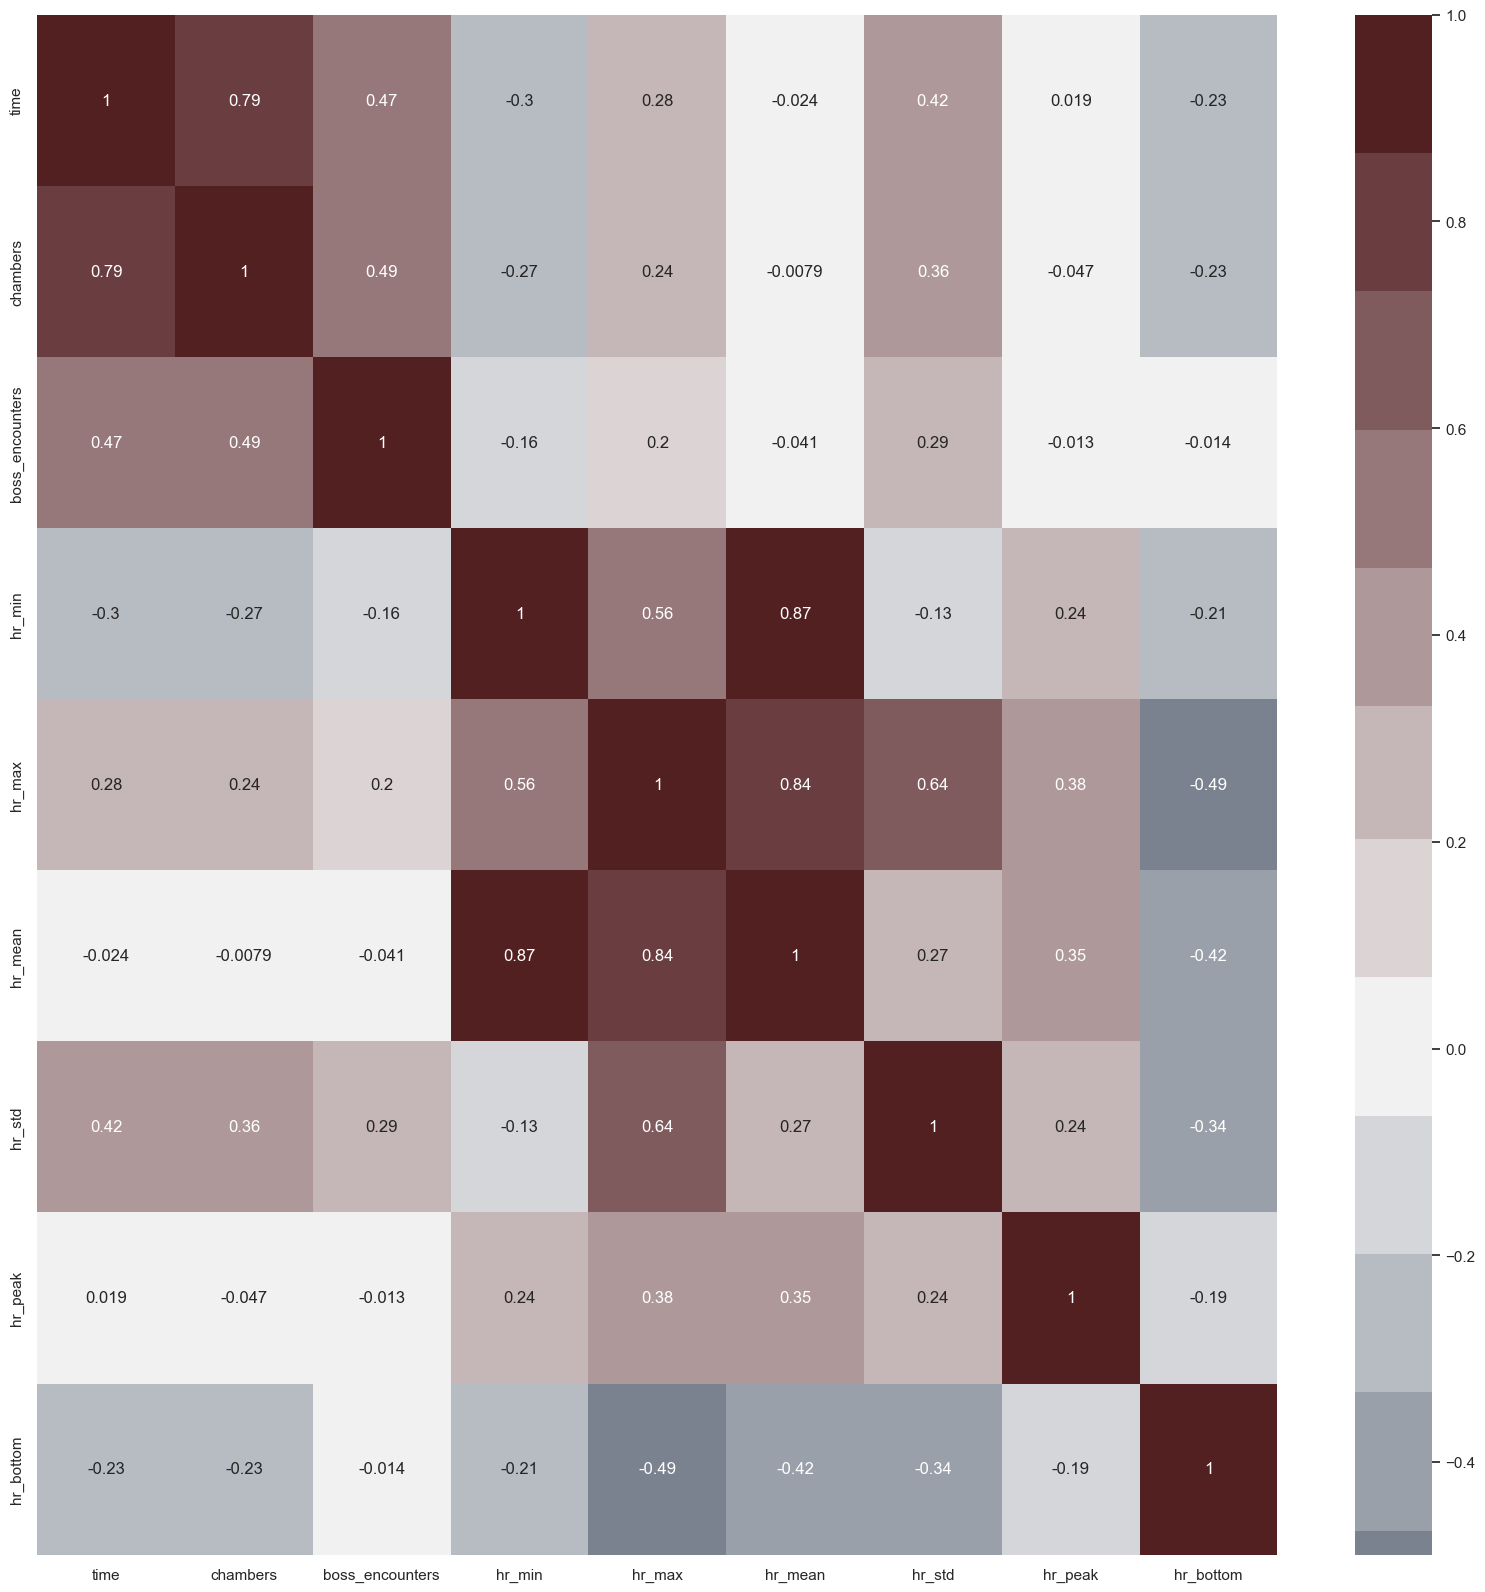

In [21]:
corr = full_set.corr(method="spearman")
sb.set(rc={'figure.figsize':(20,20)})
sb.heatmap(corr, annot=True, center=0, cmap=sb.diverging_palette(250, 10, n=15,s=50,l=20))

In [22]:
sidak_correction_alpha = 1-math.pow(1-0.05,1/len(full_set.columns))
median_performance = full_set["chambers"].median()
low_performers = full_set[:][full_set["chambers"] < median_performance]
high_performers = full_set[:][full_set["chambers"] >= median_performance]
pd.DataFrame([{"feature":c,
               "low performance mean": low_performers[c].mean(),
               "high performance mean": high_performers[c].mean(),
               "p-value": ttest_ind(low_performers[c], high_performers[c], equal_var=False)[1],
               "significance":ttest_ind(low_performers[c], high_performers[c], equal_var=False)[1]<sidak_correction_alpha}
              for c in full_set.columns]).set_index("feature")

,low performance mean,high performance mean,p-value,significance
feature,,,,
time,204.763889,397.977586,1.351188e-09,True
chambers,3.250000,8.051724,1.539837e-17,True
boss_encounters,0.000000,0.137931,3.779191e-03,True
hr_min,75.444444,73.672414,2.709191e-01,False
hr_max,90.166667,95.379310,2.565874e-02,False
hr_mean,81.786518,82.702411,6.241137e-01,False
hr_std,3.382008,4.444901,3.117085e-03,True
hr_peak,0.070231,0.054617,5.814871e-01,False
hr_bottom,0.326982,0.189996,8.790858e-03,False


<Axes: xlabel='chambers', ylabel='hr_std'>

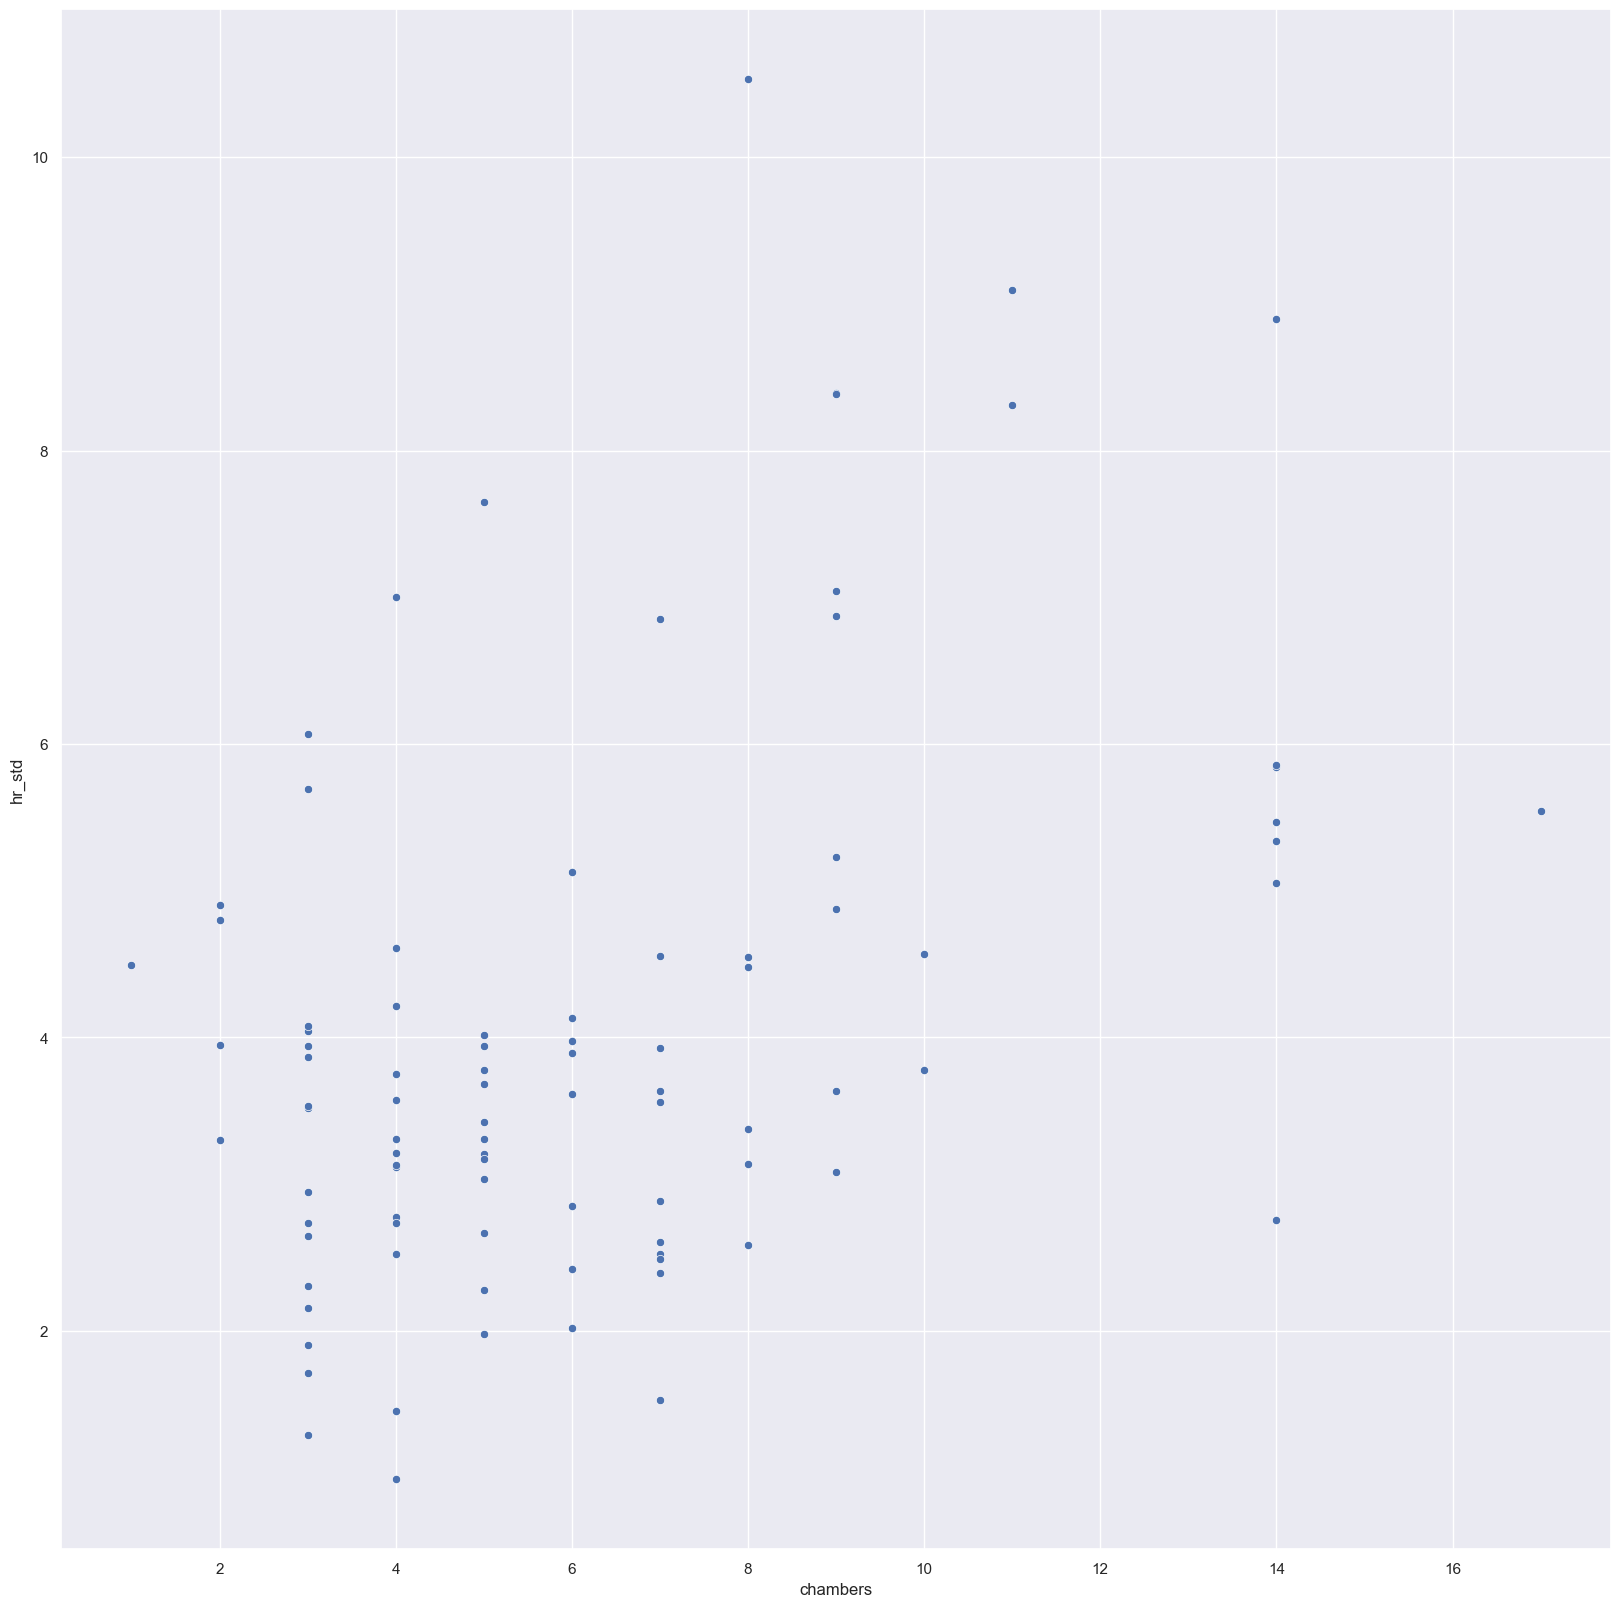

In [24]:

sb.scatterplot(data=full_set[["chambers","hr_std"]], x="chambers", y="hr_std")